# Basic GLM exploration
Notebook for Andrew to go through some GLM examples.

In [1]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

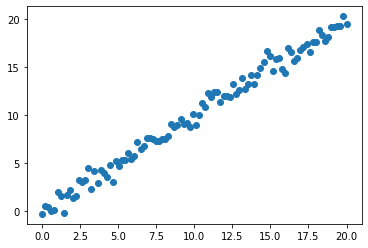

In [2]:
# simulate univariate linear data
x_linear = np.linspace(0, 20, 100)
y_linear = x_linear + np.random.normal(loc=0, scale=.7, size=len(x_linear))

plt.scatter(x_linear, y_linear);

In [3]:
linear_regression_model = sm.GLM(y_linear, x_linear, family=sm.families.Gaussian())
linear_regression_results = linear_regression_model.fit()
linear_regression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                         0.45096
Method:                          IRLS   Log-Likelihood:                -101.57
Date:                Tue, 07 Jul 2020   Deviance:                       44.645
Time:                        08:38:05   Pearson chi2:                     44.6
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0008      0.006    172.516      0.000       0.989       1.012
==============================================================================
"""

In [4]:
def predict(x, y, results):
    y_hat = results.predict(x)

    mse = np.mean((y - y_hat) ** 2)
    print('Mean Squared Error:', mse)

    plt.scatter(x, y, label='simulated data')
    plt.plot(x, y_hat, label='prediction')
    plt.legend();

Mean Squared Error: 0.44644712088494154


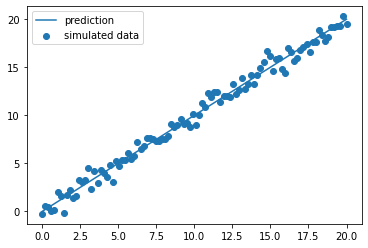

In [5]:
predict(x_linear, y_linear, linear_regression_results)

In [16]:
# simulate exponential relationship
x_exp = np.linspace(2, 5, 100)
y_exp = (np.e ** x_exp + np.random.normal(loc=0, scale=.7*x_exp, size=len(x_exp)))

# train linear model on exponential data
linear_regression_results = sm.GLM(y_exp, x_exp, family=sm.families.Gaussian()).fit()
linear_regression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                          746.79
Method:                          IRLS   Log-Likelihood:                -472.18
Date:                Tue, 07 Jul 2020   Deviance:                       73932.
Time:                        08:49:02   Pearson chi2:                 7.39e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            15.1651      0.757     20.020      0.000      13.681      16.650
==============================================================================
"""

Mean Squared Error: 739.3240203229775


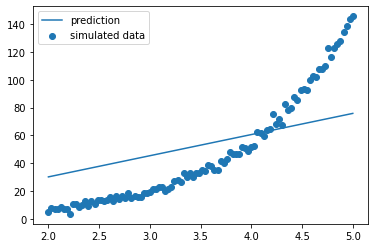

In [17]:
predict(x_exp, y_exp, linear_regression_results)

In [18]:
# train poisson model on exponential data
poisson_regression_results = sm.GLM(y_exp, x_exp, family=sm.families.Poisson()).fit()
poisson_regression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -276.11
Date:                Tue, 07 Jul 2020   Deviance:                       18.606
Time:                        08:52:30   Pearson chi2:                     17.8
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0001      0.003    291.069      0.000       0.993       1.007
==============================================================================
"""

Mean Squared Error: 6.155943211542779


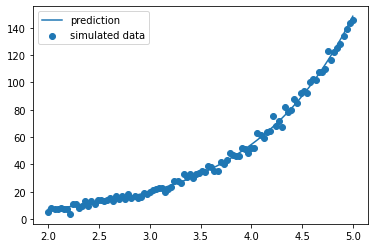

In [19]:
predict(x_exp, y_exp, poisson_regression_results)

In [22]:
# train gaussian model with log link on exponential data
log_link_results = sm.GLM(y_exp, x_exp, family=sm.families.Gaussian(sm.families.links.log)).fit()
log_link_results.summary()

<ipython-input-22-73abb88b7ad0>:2: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  log_link_results = sm.GLM(y_exp, x_exp, family=sm.families.Gaussian(sm.families.links.log)).fit()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                Gaussian   Df Model:                            0
Link Function:                    log   Scale:                          6.1940
Method:                          IRLS   Log-Likelihood:                -232.57
Date:                Tue, 07 Jul 2020   Deviance:                       613.20
Time:                        08:56:37   Pearson chi2:                     613.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9996      0.001   1114.197      0.000       0.998       1.001
==============================================================================
"""

Mean Squared Error: 6.132014936581577


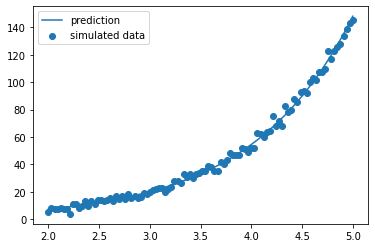

In [23]:
predict(x_exp, y_exp, log_link_results)

### What if you had two features, one that relates to the label linearly and another that relates exponentially?
I'm assuming you can't use two different families with statsmodels. Maybe you could, but you'd have to write your own families class or something of the sort. Instead what if you just transform all features to fit the a single family?

In [24]:
# simulate exponential relationship
x_exp_transformed = np.e ** x_exp

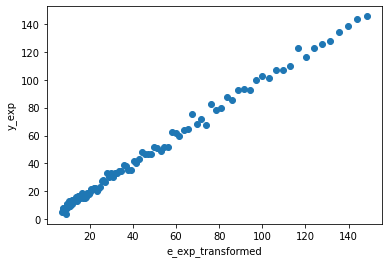

In [28]:
plt.scatter(x_exp_transformed, y_exp)
plt.ylabel('y_exp')
plt.xlabel('e_exp_transformed');

In [29]:
# train linear model on exponential data
linear_regression_results = sm.GLM(y_exp, x_exp_transformed, family=sm.families.Gaussian()).fit()
linear_regression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                          6.2013
Method:                          IRLS   Log-Likelihood:                -232.63
Date:                Tue, 07 Jul 2020   Deviance:                       613.93
Time:                        13:32:15   Pearson chi2:                     614.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9986      0.004    245.135      0.000       0.991       1.007
==============================================================================
"""

Mean Squared Error: 6.139271276093872


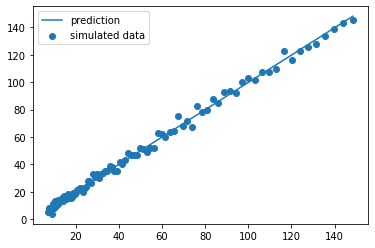

In [31]:
predict(x_exp_transformed, y_exp, linear_regression_results)